*Copyright 2019 by Gorka Munoz-Gil under the MIT license. This file is part of the Anomalous Diffusion (AnDi) Challenge, and is released under the "MIT License Agreement".

# Examples of use of ANDI

The `ANDI` class allows to generate, save and load trajectories generated with various diffusion models. Its main purpose is to generate datasets similar to the ones proposed in the ANDI challenge. Moreover, it also allows to generate datasets of trajectories of various kinds, depending on the needs of the user. In this notebook we will we review its main features.

**How to use this notebook:** If you are interested in quick overview on how to create datasets for the ANDI challenge, please go to Section 1. For further details on the creation of datasets and more details on `ANDI`, please go to Section 2. To learn how to access the various diffusion models contained in the class, please go to Section 3.

## 1 - Creating the ANDI challenge dataset

Before starting, make sure that you know the details of the competition. You can learn about every in the associated webpage. A quick overview: there are three tasks: 1) inference of the anomalous diffusion exponent, 2) classification of the diffusion model and 3) segmentation of trajectories. For each task, there are three subtasks, one per dimension. To create a dataset for every task and dimension, each e.g. of $N=10$ trajectories, you just need to run

In [3]:
from andi import ANDI

andi = ANDI()
X1, Y1, X2, Y2, X3, Y3 = andi.andi_dataset(N = 10)

Creating a dataset for task(s) [1, 2, 3] and dimension(s) [1, 2, 3].
Generating dataset for dimension 1.
Generating dataset for dimension 2.
Generating dataset for dimension 3.


`X1`, `X2` and `X3` correspond to the trajectories of Task 1, 2 and 3, respectively, while `Y1`, `Y2` and `Y_3` correspond to the labels. Each of these list contains three list, each one containing the trajectories for each dimension, in ascending order. For example, `X2[2]` contains the trajectories for Task 2 for dimension 3. If you only want to generate trajectories for a specific Task and dimensions, you can specify it as

In [4]:
X1, Y1, X2, Y2, X3, Y3 = andi.andi_dataset(N = 10, tasks = 1, dimensions = 3)

Creating a dataset for task(s) 1 and dimension(s) 3.
Generating dataset for dimension 3.


In this case **all the lists but the ones specified will be empty.** For example:

In [12]:
print('Task 3, dimension 1 is empty: len(X3[0]) = '+ str(len(X3[0])))
print('But Task 1, dimension 3 has our 10 trajectories: len(X1[2]) = '+str(len(X1[2])))

Task 3, dimension 1 is empty: len(X3[0]) = 0
But Task 1, dimension 3 has our 10 trajectories: len(X1[2]) = 10


To avoiding having to create a dataset every time we want to use it, you can use the option `save_dataset`, which will save a file for every dataset of trajectories (named task1.txt, task2.txt and task3.txt) and their corresponding labels (named ref1.txt, ref2.txt and ref3.txt). The first column of each file corresponds to the dimension of the trajectory.

In [17]:
X1, Y1, X2, Y2, X3, Y3 = andi.andi_dataset(N = 10, save_dataset = True)

Creating a dataset for task(s) [1, 2, 3] and dimension(s) [1, 2, 3].
Generating dataset for dimension 1.
Generating dataset for dimension 2.
Generating dataset for dimension 3.


Now that we saved the dataset, we can load it with the option `load_dataset`:

In [15]:
X1, Y1, X2, Y2, X3, Y3 = andi.andi_dataset(N = 10, load_dataset = True)

Creating a dataset for task(s) [1, 2, 3] and dimension(s) [1, 2, 3].


Take into account that if you saved $N=10$ trajectories, you will only be able to load this 10, even if you ask for $N=20$.

By default, the trajectories in this dataset will have a maximum length of 1000 steps and a minimum length of 10. To change that, you can use the options `max_T` and `min_T`. Take into account that you will need trajectories of 200 steps for task 3. Shorter trajectories will raise an error.

In [19]:
X1, Y1, X2, Y2, X3, Y3 = andi.andi_dataset(N = 10, min_T = 15, max_T = 200)

Creating a dataset for task(s) [1, 2, 3] and dimension(s) [1, 2, 3].
Generating dataset for dimension 1.
Generating dataset for dimension 2.
Generating dataset for dimension 3.


The rests of the optional inputs of the function (`load_trajectories`, `save_trajectories`, `N_save` and `t_save`) refer to the saving/loading of the trajectories used to generate the datasets, in `numpy` format. See Section 2 for more details on this.

## 2 - Creating datasets with the `ANDI` class

First, lets import the ANDI class from the file:

In [1]:
from andi import ANDI
# We also import numpy and pyplot
import numpy as np
from matplotlib import pyplot as plt

First, let's define the class. One thing we can do is to access the available diffusion models:

In [2]:
andi = ANDI()
andi.avail_models_name

['attm', 'ctrw', 'fbm', 'lw', 'sbm']

The label asigned to each model is given by its position in the previous list. Now, we will generate a dataset containing $N=2$ trajectories per model and exponent. We will consider anomalous exponents $\alpha = [0.7, 0.9]$ and lenghts $T=5$ from the models `attm` and `fbm`.

In [7]:
dataset = andi.create_dataset(T = 5, N = 2, exponents = [0.7, 0.9], models = [0, 2])

print(np.round(dataset,2))

[[ 0.    0.7   0.    1.09  1.21  0.76  1.77]
 [ 0.    0.7   0.   -1.11 -0.12 -0.35  2.46]
 [ 0.    0.9   0.    0.59 -0.33 -1.03 -0.45]
 [ 0.    0.9   0.    0.02  0.03  0.02  0.02]
 [ 2.    0.7   0.   -0.28 -0.35 -0.89 -1.39]
 [ 2.    0.7   0.   -1.01  0.44  1.02  0.41]
 [ 2.    0.9   0.   -0.82 -0.46  0.09 -0.35]
 [ 2.    0.9   0.   -0.04  0.61  0.2   0.96]]


Each row corresponds to a trajectory. The first column is the model label, while the second column labels the exponent. The rest of the row is the trajectory. The default dimension for the trajectories is one. We will see later how to create trajectories with more dimensions.

In the previous example, the number of trajectories per model and exponent were equal, i.e. we were a balanced dataset. We can also create unbalanced dataset where we indicate exactly the number of trajectories for each exponent and model, by defining $N$ as two-dimensional numpy array. Rows follow the models and columns the exponents:

In [8]:
new_N = np.array([[1, 2],[3, 1]])

dataset = andi.create_dataset(T = 5, N = new_N, exponents = [0.7, 0.9], models = [0, 2])

print(np.round(dataset,2))

[[ 0.    0.7   0.   -0.52  0.7  -0.75 -0.65]
 [ 0.    0.9   0.    1.29  2.55  1.82  2.45]
 [ 0.    0.9   0.   -0.04 -2.31 -1.51  0.1 ]
 [ 2.    0.7   0.    0.75 -0.15 -0.18  0.38]
 [ 2.    0.7   0.   -1.05 -1.06 -0.46 -0.72]
 [ 2.    0.7   0.    0.15  0.01  0.45  0.31]
 [ 2.    0.9   0.    0.66  1.16  1.63  1.15]]


To create datasets of trajectories with higher dimensions, you can use the input `dimensions`. The trajectories will be outputed as a single row of the dataset matrix. This means that if you create a dataset of trajectories of length $T = 10$ and dimensions 2, the number of columns of the dataset will be 2 (the labels) + $2\cdot 10$ (the trajectory). Here is an example:

In [33]:
dataset = andi.create_dataset(T = 10, N = 1, exponents = [0.7], models = [2], dimension = 2)
print(np.round(dataset[0], 2))

[ 2.    0.7   0.    0.47 -0.43  0.1   1.24  1.32 -0.1  -0.68 -0.64 -0.19
  0.   -0.06 -0.25 -0.15 -0.04  0.15 -0.5  -0.68 -0.82 -0.37]


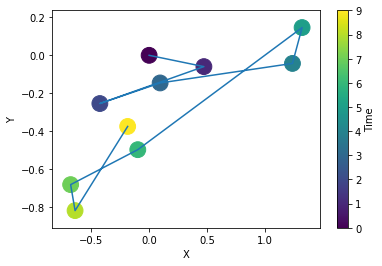

In [48]:
plt.plot(dataset[0,2:12], dataset[0, 12:], '-')
plt.scatter(dataset[0,2:12], dataset[0,12:], c=np.arange(10), s = 250)
plt.colorbar().set_label('Time'); plt.xlabel('X'); plt.ylabel('Y');

### Saving and loading datasets

ANDI allows also to save and load datasets, avoiding the need of generate new trajectories each time we want to create a dataset. There exist two optional inputs to the function `create_datasets`: `save_trajectories` and `load_trajectories`, which if `True`, save and load datasets, respectively. A dataset for each exponent and model considered are saved in a .h5py file whose name is the model considered. Each file contains datasets for each exponent.

In these cases, two important variables take also into play, `t_save` and `N_save`. These set the lenght and number of trajectories to save for each exponent and model. They are set as default to `t_save`$=10^3$ and `N_save`$=10^4$ as this allows to create any other combinantion of dataset. See that in the ANDI challenge we will never consider trajectories longer than $T=10^3$. 

The name of the datasets inside the .h5py file is then `(exponent)_(t_save)_(N_save)`.

Using the default values for this two variables, let's save datasets for the previous examples:

In [9]:
dataset = andi.create_dataset(T = 4, N = 2, exponents = [0.7, 0.9], models = [0, 2], 
                              save_trajectories = True, path = 'datasets/')

print(np.round(dataset,2))

100%|██████████| 10000/10000 [02:40<00:00, 62.25it/s, exponent=0.9, model=fbm, saving=1]


[[ 0.    0.7   0.    0.    0.    0.  ]
 [ 0.    0.7   0.    0.   -0.07  1.63]
 [ 0.    0.9   0.    0.04  0.04  0.94]
 [ 0.    0.9   0.    0.   -0.    0.  ]
 [ 2.    0.7   0.    0.19  0.15  0.22]
 [ 2.    0.7   0.    0.03 -0.07 -0.05]
 [ 2.    0.9   0.    0.06 -0.01 -0.05]
 [ 2.    0.9   0.    0.02  0.07  0.09]]


If the datasets were already saved, we can load them instead:

In [11]:
dataset = andi.create_dataset(T = 4, N = 2, exponents = [0.7, 0.9], models = [0, 2], 
                              load_trajectories = True, path = 'datasets/')

print(np.round(dataset,2))

[[ 0.    0.7   0.    0.    0.    0.  ]
 [ 0.    0.7   0.    0.   -0.07  1.63]
 [ 0.    0.9   0.    0.04  0.04  0.94]
 [ 0.    0.9   0.    0.   -0.    0.  ]
 [ 2.    0.7   0.    0.19  0.15  0.22]
 [ 2.    0.7   0.    0.03 -0.07 -0.05]
 [ 2.    0.9   0.    0.06 -0.01 -0.05]
 [ 2.    0.9   0.    0.02  0.07  0.09]]


### Creating noisy datasets

The class also allows to create noisy trajectories via `create_noisy_dataset`. This functions works as `create_dataset` but has three extra optional input parameters: `noise_func`, `sigma` and `mu`. If `noise_func` is `False`, the function generates a dataset with Gaussian noise with variance `sigma` and mean `mu`. Keep in mind that the function will never save noisy trajectories. The saved/loaded trajectories will never have noise, which will be added a posteriori. Here is an example with Gaussian noise:

In [14]:
# The default value of noise_func is False, so we don't need to input it. 
# Default value of sigma is 1 and mu is 0.
dataset_noisy = andi.create_noisy_dataset(T = 4, N = 2, 
                                          sigma = 0.5, mu = 0,
                                          exponents = [0.7, 0.9], models = [0, 2], 
                                          load_trajectories = True, path = 'datasets/')

print(np.round(dataset_noisy,2))

[[ 0.    0.7   0.46  0.35  0.71 -0.17]
 [ 0.    0.7   0.08  0.49  0.3   1.28]
 [ 0.    0.9   0.55  0.89  0.17  1.52]
 [ 0.    0.9  -0.16  0.7  -0.27 -0.39]
 [ 2.    0.7  -0.75  0.41  0.66 -0.17]
 [ 2.    0.7   0.66 -0.19  0.2  -0.67]
 [ 2.    0.9   0.15 -0.14  0.61  0.4 ]
 [ 2.    0.9   0.06 -0.18  0.2  -0.  ]]


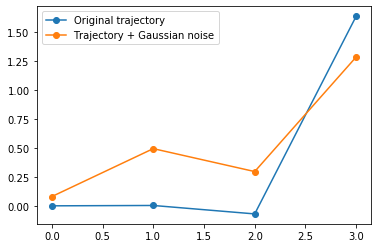

In [16]:
plt.plot(dataset[1,2:],'o-', label = 'Original trajectory')
plt.plot(dataset_noisy[1,2:],'o-', label = 'Trajectory + Gaussian noise')
plt.legend();

You can also define your own noise function. The noise created by this functions will be added to each of the trajectories of the dataset. The ouput must be a matrix of size given as input:

In [19]:
# Uniformly distributed noise
def uniform_noise(N, M):
    return np.random.rand(N, M)*(2*np.random.randint(2, size = (N, M))-1) 

dataset_uniform = andi.create_noisy_dataset(T = 4, N = 2, 
                                          noise_func = uniform_noise,
                                          exponents = [0.7, 0.9], models = [0, 2], 
                                          load_trajectories = True, path = 'datasets/')

print(np.round(dataset_uniform,2))

[[ 0.    0.7  -0.48 -0.15 -0.1   0.14]
 [ 0.    0.7   0.81  0.63 -0.2   2.25]
 [ 0.    0.9  -0.87  0.35 -0.23  1.  ]
 [ 0.    0.9  -0.13  0.85  0.7  -0.2 ]
 [ 2.    0.7  -0.45 -0.07 -0.35 -0.57]
 [ 2.    0.7  -0.73  0.79  0.22  0.72]
 [ 2.    0.9  -0.49  0.66 -0.05 -0.92]
 [ 2.    0.9   0.56 -0.83  0.87 -0.9 ]]


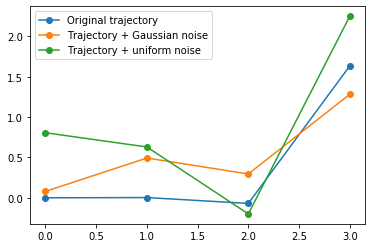

In [20]:
plt.plot(dataset[1,2:],'o-', label = 'Original trajectory')
plt.plot(dataset_noisy[1,2:],'o-', label = 'Trajectory + Gaussian noise')
plt.plot(dataset_uniform[1,2:],'o-', label = 'Trajectory + uniform noise')
plt.legend();

## Creating segmented datasets

The class `ANDI` also allows to create trajectories which are made of two different diffusion models or anomalous exponent, at a given changing point. Such function has the name `create_segmented_dataset`. Following the ANDI challenge guidelines, the output trajectories will have length 200. However, you can choose an arbitrary length with the variable `final_length`. The input datasets must have at least the same size as `final_length`. There is also the option to randomly shuffle the input datasets from which the segmented output dataset will be generate, throught the variable `random_shuffle`.

In [22]:
# First we define two datasets. Let's take same anomalous exponent but various models
dataset1 = andi.create_dataset(T = 200, N = 2, exponents = [0.7], models = [0, 1, 2, 4])
dataset2 = andi.create_dataset(T = 200, N = 2, exponents = [0.7], models = [0, 1, 2, 4])
# Now we give them to the desired function
seg = andi.create_segmented_dataset(dataset1, dataset2)

The first 5 elements of every row of the variable `seg` label the trajectory. First point is the changing time, second and third, and fourth and fifthe are the labels of the model and exponent of the input trajectories, respectevely.

In [23]:
seg[:, :5]

array([[119. ,   0. ,   0.7,   0. ,   0.7],
       [148. ,   0. ,   0.7,   0. ,   0.7],
       [130. ,   1. ,   0.7,   1. ,   0.7],
       [ 87. ,   1. ,   0.7,   1. ,   0.7],
       [107. ,   2. ,   0.7,   2. ,   0.7],
       [  6. ,   2. ,   0.7,   2. ,   0.7],
       [175. ,   4. ,   0.7,   4. ,   0.7],
       [148. ,   4. ,   0.7,   4. ,   0.7]])

As we did not shuffle data and `dataset1` and `dataset2` have the trajectories ordered by model, there are no mixes between different models. This can be done thanks to the `random_shuffle` variable:

In [25]:
seg = andi.create_segmented_dataset(dataset1, dataset2, random_shuffle = True)
seg[:, :5]

array([[ 89. ,   4. ,   0.7,   1. ,   0.7],
       [139. ,   4. ,   0.7,   0. ,   0.7],
       [113. ,   2. ,   0.7,   1. ,   0.7],
       [ 63. ,   0. ,   0.7,   2. ,   0.7],
       [ 14. ,   1. ,   0.7,   0. ,   0.7],
       [113. ,   2. ,   0.7,   4. ,   0.7],
       [155. ,   0. ,   0.7,   4. ,   0.7],
       [123. ,   1. ,   0.7,   2. ,   0.7]])

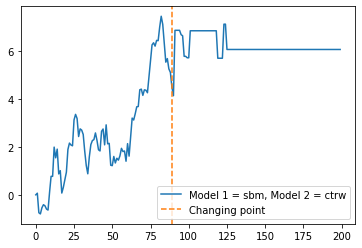

In [26]:
plt.plot(seg[0,5:], label = 'Model 1 = '+andi.avail_models_name[int(seg[0, 1])]+', Model 2 = '+andi.avail_models_name[int(seg[0, 3])])
plt.axvline(seg[0,0], c = 'C1', ls = '--', label = 'Changing point')
plt.legend();

## Accesing the diffusion models of ANDI

All the diffusion models available in ANDI are collected in the file `diffusion_models.py`. We can access them with a simple import :

In [49]:
from diffusion_models import diffusion_models
# We will also need the following libraries
import inspect

There exist three subclasses, one for each dimensions. To see the available models for each dimension, you can use the following:

In [50]:
for dimensions in range(3):
    if dimensions == 0:
        models = diffusion_models.oneD()
    elif dimensions == 1:
        models = diffusion_models.twoD()
    elif dimensions == 2:
        models = diffusion_models.threeD()
        
    available_models = inspect.getmembers(models, inspect.ismethod)
        
    print('\nThe availailabe models for dimension '+str(dimensions+1)+' are:')
    [print('- '+x[0]) for x in available_models]



The availailabe models for dimension 1 are:
- attm
- ctrw
- fbm
- lw
- sbm

The availailabe models for dimension 2 are:
- attm
- ctrw
- fbm
- lw
- sbm

The availailabe models for dimension 3 are:
- attm
- ctrw
- fbm
- lw
- sbm


**One dimensional trajectories**

For this example, we will create a trajectory of a 1D  continuous time random walk (ctrw). All the model functions must have as inputs the length of the trajectories and the anomalous exponent $\alpha$:

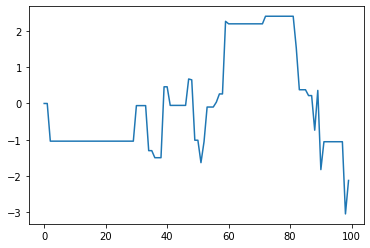

In [18]:
oneD = diffusion_models.oneD()

traj = oneD.ctrw(T = 100, alpha = 0.8)
plt.plot(traj)

Some diffusion models are constructed from a collection of positions at different sampling times. This means that their output array does not have $T$ points, but rather number $m$ of sampled posisition. In order to acces such kind of information, some model generators have the optional parameter `regulare_time`, which if `False`, makes the function to return an array with two rows and $m$ columns. The first row are the sampling times and the second are the positions. CTRW is an example of these models:

In [25]:
traj_nonR = oneD.ctrw(T = 100, alpha = 0.8, regular_time = False)
traj_nonR.shape

(2, 20)

If `regulare_time = True` (default value), the trajectory is fed to the function `regularize` from `utils.py`, which transforms the trajectory to regular sampling times. Below is an example with the previously defined trajectory. The offset is due to the need of rounding the times coming from the variable `traj_nonR[1]`.

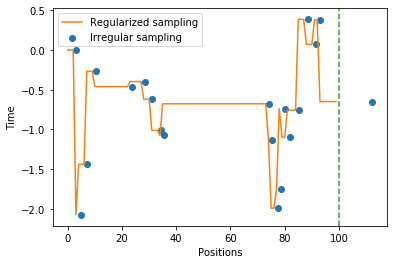

In [26]:
from utils import regularize

traj_R = regularize(positions = traj_nonR[1,:], times = traj_nonR[0, :], T = 100)

fig, ax = plt.subplots()
ax.scatter(traj_nonR[0,:], traj_nonR[1, :], c = 'C0', label = 'Irregular sampling')
ax.plot(traj_R, c = 'C1', label = 'Regularized sampling')
ax.set_xlabel('Positions'); ax.set_ylabel('Time'); ax.axvline(100,ls = '--', c = 'C2')
ax.legend();

**Two dimensional trajectories**

We will proceed with an example of a 2D trajectory coming from the ATTM model. 2D trajectories are output as an array of length $2\times T$.

In [21]:
diff_mod = diffusion_models()
T = 20
traj = diff_mod.twoD().attm(T = T, alpha = 0.8)
print(traj.shape)

(40,)


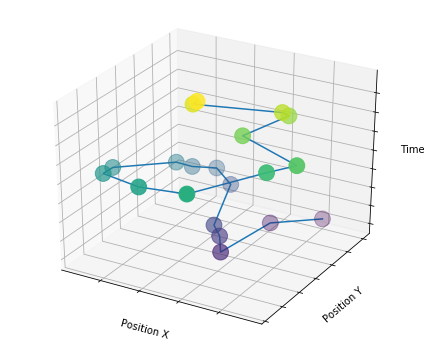

In [22]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize = (6,5))
ax = fig.gca(projection='3d')
ax.plot(traj[:T], traj[T:], np.arange(T))
scat = ax.scatter3D(traj[:T], traj[T:], np.arange(T), c=np.arange(T), s = 250);
ax.set_xlabel('Position X')
ax.set_ylabel('Position Y')
ax.set_zlabel('Time')
ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
ax.zaxis.set_ticklabels([])
plt.tight_layout();

**Ensemble averages of `diffusion_models` trajectories**

In ANDI, one of the parameters to be extracted is the anomalous exponent $\alpha$. This exponents corresponds to the proportionality relation between the mean squared displacement averaged over $N$ trajectories (eMSD) and time: $\left< x^2(t) \right>\sim t^\alpha$. Here are a series of examples of eMSD calculated for various models:

*(If your viewer does not allow you to see the following images, you can see them in the folder `figures/`)*

*Subdiffusive trajectories:*

<img src="figures/eMSD_0.8.png" width=600>


*Superdiffusive trajectories:*

<img src="figures/eMSD_1.4.png" width=600>